<h1 id='part1'>Section 1: Business Understanding</h1>
This Airbnb datasets describe the listing and calendar acitivities of the homestays in Seattle. 

<h2 id='part1'>Project Motivation</h2>

For this project, I wanted to have a better understanding on the availability of the accommodations in Seattle from January 2016 until January 2017.
Therefore, my goal was to answer the following questions: 

**Question 1:** How does the Airbnb availability look by month?

**Question 2:** How does the Airbnb pricing distribution look by month? 

**Question 3:** What are the top 5 neighborhoods based on availability?

**Question 4:** Can we predict the future availability in the top 5 neighborhoods?

<h1 id='part1'>Section 2: Data Understanding</h1>

<h2 id='part1'>Gatehring Initial Data</h2>

Let´s now import the necessary dictionaries and the Seattle Airbnb Dataset

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
#Import the Calendar Seattle Airbnb Dataset
df_calendar = pd.read_csv('calendar.csv')
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
#Import the Listing Seattle Airbnb Dataset
df_listings = pd.read_csv('listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
#Let´s shortly explore both datasets:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [5]:
#2nd get information on the dataframe: 
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [6]:
#In order to have a dataset that concentrates on the questions we want to answer, we will now merge both datasets.
#By doing this, we will create a subset dataframe, that we will use to work from now on: 

merged_df = pd.merge(df_calendar[['listing_id', 'date', 'available', 'price']], 
                     df_listings[['id', 'neighbourhood_cleansed']], 
                     left_on='listing_id', right_on='id', 
                     how = 'inner')

#Drop the second id identifier from df_listings, as we do not need it anymore: 
merged_df = merged_df.drop(columns=['id'])

merged_df.head()

,listing_id,date,available,price,neighbourhood_cleansed
0,241032,2016-01-04,t,$85.00,West Queen Anne
1,241032,2016-01-05,t,$85.00,West Queen Anne
2,241032,2016-01-06,f,NaN,West Queen Anne
3,241032,2016-01-07,f,NaN,West Queen Anne
4,241032,2016-01-08,f,NaN,West Queen Anne


<h2 id='part1'>Describe & Explore the Data</h2>

During this process, we will look into the properties of the data. 
This will enable us to understand the steps we need to take in the data cleaning phase. 

In [7]:
#To do so, we will understand the shape of our dataframe
merged_df.shape

(1393570, 5)

In [8]:
#Understand the datatypes each variable represent:
merged_df.dtypes

listing_id                 int64
date                      object
available                 object
price                     object
neighbourhood_cleansed    object
dtype: object

Here we already see that we will need to tackle the dtypes of our variables. 

In [9]:
#Let´s confirm all the necessary columns for our analysis are available: 
merged_df.columns

Index(['listing_id', 'date', 'available', 'price', 'neighbourhood_cleansed'], dtype='object')

In [10]:
#Provide a set of columns with 0 missing values.
no_nulls = set(merged_df.columns[merged_df.isnull().mean()==0])
no_nulls

{'available', 'date', 'listing_id', 'neighbourhood_cleansed'}

In [11]:
#Provide the columns with missing values.
null_cols = merged_df.columns[merged_df.isnull().any()]
null_cols

Index(['price'], dtype='object')

In this step of our data exploration, we can see that we will need to handle the missing values for the variable 'price'.

<h1 id='part1'>Section 3: Data Preparation</h1>

In the previous section, we identified some cleaning issues that we will now work through, in order to answer our questions.

**1. Data Type Cleaning:**

In [12]:
#Clean the dtypes:
merged_df['listing_id'] = merged_df['listing_id'].astype('str')
merged_df['listing_id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1393570 entries, 0 to 1393569
Series name: listing_id
Non-Null Count    Dtype 
--------------    ----- 
1393570 non-null  object
dtypes: object(1)
memory usage: 10.6+ MB


In [13]:
#Let´s continue with the variable "date":
merged_df['date'] = pd.to_datetime(merged_df['date'])

In [14]:
#Use 'coerce' to handle invalid parsing
merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')
merged_df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1393570 entries, 0 to 1393569
Series name: date
Non-Null Count    Dtype         
--------------    -----         
1393570 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 10.6 MB


In [15]:
#The variable 'available' appears to be an object, when we would need it to be a boolean dtype:
merged_df['available'] = merged_df['available'].map({'t': True, 'f': False})
merged_df['available'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1393570 entries, 0 to 1393569
Series name: available
Non-Null Count    Dtype
--------------    -----
1393570 non-null  bool 
dtypes: bool(1)
memory usage: 1.3 MB


In [16]:
#The varialbe 'price' is an object, when it should be a float. 
#As I saw when checking on the head of the df, I saw the symbol $.
#1st I would need to replace it and then change the dtype:
merged_df['price'] = merged_df['price'].str.replace('$', '', regex=False)
merged_df['price'] = merged_df['price'].str.replace(',', '', regex=False)

merged_df['price'] = merged_df['price'].astype('float')

In [17]:
merged_df['price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1393570 entries, 0 to 1393569
Series name: price
Non-Null Count   Dtype  
--------------   -----  
934542 non-null  float64
dtypes: float64(1)
memory usage: 10.6 MB


**2. Handling Missing Values:**

We have seen that every time a property is not available, we do not have a price value for it. 

This is how we are going to handle the missing values:

- We are going to calculate the mean price for each property.
- Then, we will impute the missing values using the calculated price. 

In [18]:
# 1st - calculate the mean price for each property, using the unique identified in listing_id
mean_prices = merged_df.groupby('listing_id')['price'].mean()
mean_prices

listing_id
10000273    182.080925
1000883     102.916667
10012724     25.000000
10015967           NaN
10019082    131.696629
               ...    
9979329     204.260274
9994758      86.951220
9995551      79.000000
9999759     340.983607
9999955      55.000000
Name: price, Length: 3818, dtype: float64

In [19]:
#2nd - fill missing values in the price column using the mean prices:
merged_df['price'] = merged_df['price'].fillna(merged_df['listing_id'].map(mean_prices))
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 5 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   listing_id              1393570 non-null  object        
 1   date                    1393570 non-null  datetime64[ns]
 2   available               1393570 non-null  bool          
 3   price                   1358895 non-null  float64       
 4   neighbourhood_cleansed  1393570 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 43.9+ MB


<h1 id='part1'>Section 5: Evaluation</h1>

<h2 id='part1'>Question 1: How does the Airbnb availability look by month?</h2>

In [20]:
#In order to answer this question, we will need to follow this steps: 

#1st - Create a new variable extrancting the month_year:
merged_df['month_year'] = merged_df['date'].dt.to_period('M')

#2nd - Groupby the month_year:
availability_by_month = merged_df.groupby('month_year')['available'].mean()
availability_by_month

month_year
2016-01    0.554133
2016-02    0.662208
2016-03    0.709187
2016-04    0.663847
2016-05    0.675670
2016-06    0.674384
2016-07    0.627097
2016-08    0.645051
2016-09    0.674402
2016-10    0.696514
2016-11    0.713986
2016-12    0.735573
2017-01    0.746202
Freq: M, Name: available, dtype: float64

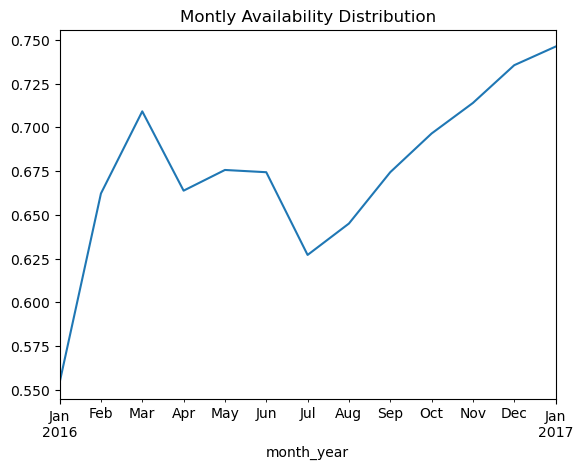

In [21]:
#Visualization of the property availability from Jan 2016 - Jan 2017:
availability_by_month.plot(title='Montly Availability Distribution');

<h3 id='part1'>Monthly Availability Distribution:</h3>

We can see that during this period, there are two availability peaks: 
- In March 2016 the availability was slightly over 70%
- The next peak starts in November 2016 (71%) until January 2017 (74%)

The lowest availability can be registered in the following months: 
- January 2016 - 55%
- July 2016 - 62%

I was personally expecting to see a seasonal availability trend: lower availability during the Christmas and sommer months. 

However this is not the case. So it would be now interesting to look if the number of properties increased since the beginning of 2016.

In [22]:
# Count the number of property entries per month 
properties_month= merged_df.groupby('month_year')['listing_id'].count()
properties_month

month_year
2016-01    106904
2016-02    110722
2016-03    118358
2016-04    114540
2016-05    118358
2016-06    114540
2016-07    118358
2016-08    118358
2016-09    114540
2016-10    118358
2016-11    114540
2016-12    118358
2017-01      7636
Freq: M, Name: listing_id, dtype: int64

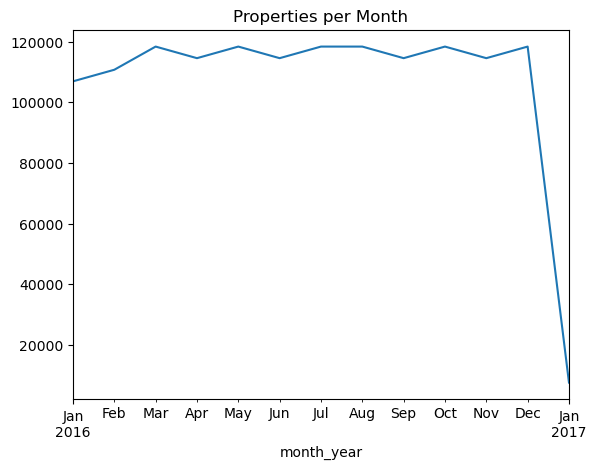

In [23]:
properties_month.plot(title='Properties per Month');

<h3 id='part1'>Monthtly Availability Distribution based of count of listing_id per month:</h3>

It is interesting to see that the January 2017 data seems not to be complete.
Therefore, we will drop this month for a better analysis of our data and be able to answer better our future questions. 

In [24]:
#Drop Jan 2017 data
merged_df = merged_df[merged_df['month_year'] != '2017-01']
properties_month_2= merged_df.groupby('month_year')['listing_id'].count()
availability_by_month_2 = merged_df.groupby('month_year')['available'].mean()

C:\Users\MILM004\AppData\Local\Temp\ipykernel_17884\2709781395.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(x_labels, rotation=45)


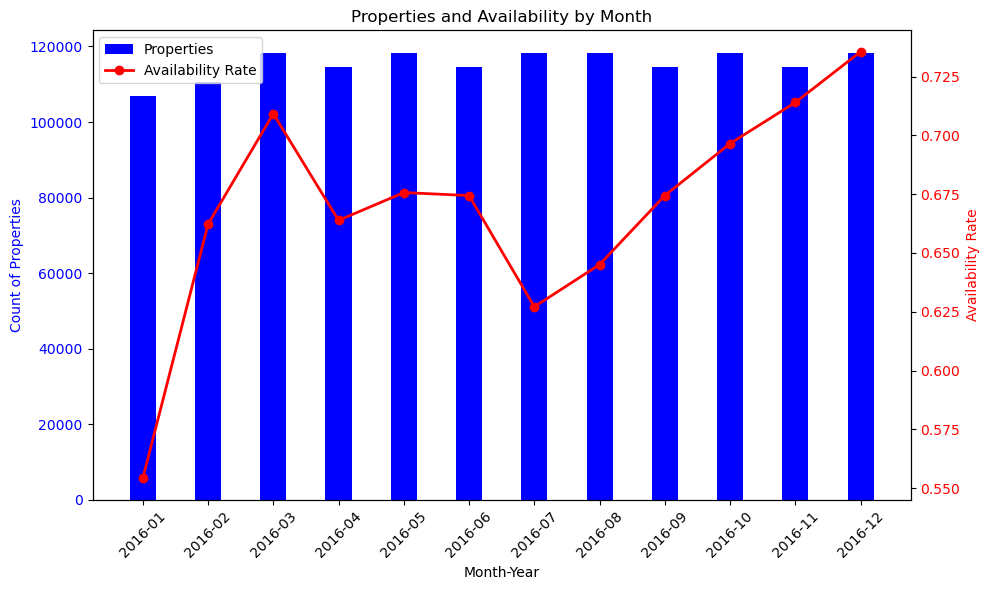

In [25]:
# Convert the index to strings for plotting
x_labels = properties_month_2.index.strftime('%Y-%m')

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Manually plot the bar chart
ax1.bar(x_labels, properties_month_2.values, color='b', width=0.4, label='Properties')
ax1.set_ylabel('Count of Properties', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xlabel('Month-Year')
ax1.set_xticklabels(x_labels, rotation=45)

# Plot the line chart for availability rates
ax2 = ax1.twinx()
ax2.plot(x_labels, availability_by_month_2.values, color='r', marker='o', linewidth=2, label='Availability Rate')
ax2.set_ylabel('Availability Rate', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title and legends
ax1.set_title('Properties and Availability by Month')
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()

This new visualization with data that is available which is also complete, provides us a much better picture of the current situation

The availability increased as the count of listing_ids per month also increased starting from February 2016. 